In [13]:
import pandas as pd
data = pd.read_excel('Malaria_Research_Data.xlsx', header=0)
total_spectra = data.groupby('Experiment name')['Protein percentage of total spectra'].sum()
data['Normalized protein percentage'] = (data['Protein percentage of total spectra']/data['Experiment name'].map(total_spectra))*100
print(data) 

                                  Experiment name Biological sample category   
0        SPP vs. NAT coIP results recieved 1.9.23                        NAT  \
1        SPP vs. NAT coIP results recieved 1.9.23                        NAT   
2        SPP vs. NAT coIP results recieved 1.9.23                        NAT   
3        SPP vs. NAT coIP results recieved 1.9.23                        NAT   
4        SPP vs. NAT coIP results recieved 1.9.23                        NAT   
...                                           ...                        ...   
19259  SPP vs. NAT coIP results recieved 11.15.22                        SPP   
19260  SPP vs. NAT coIP results recieved 11.15.22                        SPP   
19261  SPP vs. NAT coIP results recieved 11.15.22                        SPP   
19262  SPP vs. NAT coIP results recieved 11.15.22                        SPP   
19263  SPP vs. NAT coIP results recieved 11.15.22                        SPP   

                                       

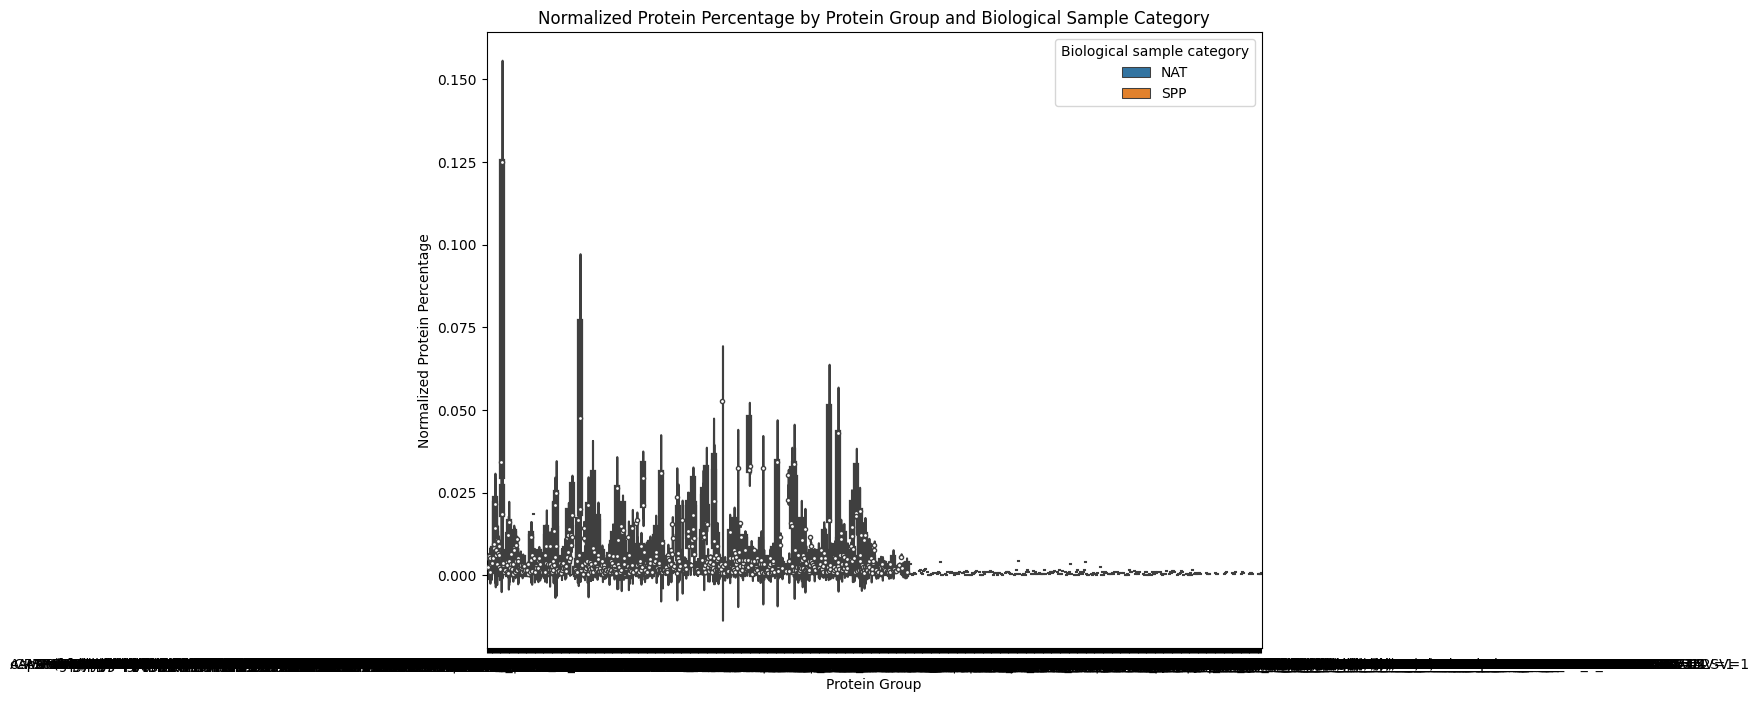

In [12]:
# Select the columns for the violin plot
violin_data = data[['Protein group', 'Biological sample category', 'Normalized protein percentage']]

# Create the violin plot
plt.figure(figsize=(10, 8))
sns.violinplot(x='Protein group', y='Normalized protein percentage', hue='Biological sample category', data=violin_data)

# Add title and labels
plt.title('Normalized Protein Percentage by Protein Group and Biological Sample Category')
plt.xlabel('Protein Group')
plt.ylabel('Normalized Protein Percentage')

# Show the violin plot
plt.show()



In [1]:
import pandas as pd
from scipy import stats

data = pd.read_excel('Malaria_Research_Data.xlsx', header=0)

spp_data = data[data['Biological sample category'] == 'SPP']
nat_data = data[data['Biological sample category'] == 'NAT']

# Perform t-test for each protein
t_stat, p_value = stats.ttest_ind(spp_data['Normalized protein percentage'], nat_data['Normalized protein percentage'])

adjusted_p_values = p_value * 2  # Bonferroni correction for two tests

significantly_enriched_proteins = data[adjusted_p_values < 0.025]



NameError: name 'data' is not defined